<a href="https://colab.research.google.com/github/asis012/tensorflow_practice/blob/master/tensorflow_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np

In [0]:
np.random.seed(101)
tf.set_random_seed(101)

what is seed?
it will give same value in any random iteration

In [5]:
rand_a = np.random.uniform(0,100,(5,5))
rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [6]:
rand_b = np.random.uniform(0,100,(5,1))
rand_b

array([[99.43179012],
       [52.06653967],
       [57.87895355],
       [73.48190583],
       [54.19617722]])

In [0]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [0]:
add = a + b
mull = a * b

In [0]:
with tf.Session() as sess:
  add_result = sess.run(add,feed_dict=({a:rand_a,b:rand_b}))
  mul_result= sess.run(mull,feed_dict=({a:rand_a,b:rand_b}))

In [10]:
print(add_result)

[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]


In [11]:
print(mul_result)

[[5134.644   5674.25     283.12433 1705.4707  6813.8315 ]
 [4341.8125  1598.267   4652.734   3756.8293   988.94635]
 [3207.8113  2038.1029  1052.7742  4546.9805  5588.1157 ]
 [1707.379    614.02527 4434.989   5356.7773  2029.8555 ]
 [3714.0984  2806.6438   262.76764  747.19855 1013.292  ]]


**First Neural Network**

In [0]:
n_f = 10
n_d_n = 3

10 feautures and each features there are 3 neuron layer





In [0]:
x = tf.placeholder(tf.float32,(None,n_f))

In [0]:
#y = mx + c
b = tf.Variable(tf.zeros([n_d_n]))

w = tf.Variable(tf.random_normal([n_f,n_d_n]))



In [0]:
mx = tf.matmul(x,w)

In [0]:
c = tf.add(mx,b)

In [0]:
#activation fun

a = tf.sigmoid(c)

In [0]:
init = tf.global_variables_initializer()

In [0]:
with tf.Session() as sess:
  sess.run(init)
  layer_out = sess.run(a,feed_dict={x:np.random.random([1,n_f])})

In [20]:


print(layer_out)

[[0.53415525 0.44564104 0.5842615 ]]


**regression example**


In [0]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.52,1.5,10)

In [22]:
x_data

array([-1.22661763, -0.09828946,  2.82077426,  4.50258254,  3.40631655,
        4.86778464,  7.17759109,  6.75397321,  9.48702972,  9.95265837])

In [0]:
y_label= np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [0]:
import matplotlib.pyplot as plt

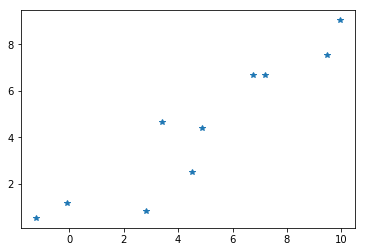

In [25]:
plt.plot(x_data,y_label,"*")

In [0]:
#y = mx + c

In [31]:
np.random.rand(2)

array([0.67026042, 0.6517677 ])

In [0]:
m = tf.Variable(0.98)
b = tf.Variable(0.85)

In [0]:
error = 0 
for x,y in zip(x_data,y_label):
  y_hat = m *x + b
  error = error + (y-y_hat)**2
  

# init =tf.global_variables_initializer()
# sess = tf.InteractiveSession()
# sess.run(init)
# print(sess.run(error))

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [0]:
init = tf.global_variables_initializer()

In [61]:
with tf.Session() as sess:
  sess.run(init)
  print(sess.run(error))
   
  epochs =2
  for i in range(epochs):
    sess.run(train)
  final_slope, final_intercept = sess.run([m,b])

29.195858


In [48]:
final_slope

0.7749626

In [49]:
final_intercept

0.8213054

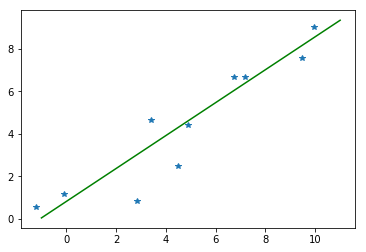

In [73]:
x_test = np.linspace(-1,11,10)
y_pred_plot = final_slope*x_test + final_intercept
plt.plot(x_test,y_pred_plot,'g')
# plt.plot(x_data,y_label,"g")
plt.plot(x_data,y_label,"*")


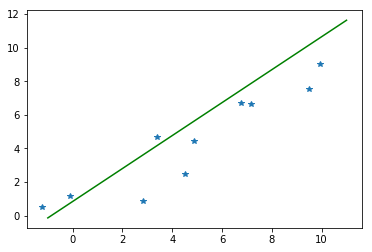

In [74]:
y_pred_plot = 0.98*x_test + 0.85
plt.plot(x_test,y_pred_plot,'g')
plt.plot(x_data,y_label,"*")